In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
import sklearn.svm
import sklearn.discriminant_analysis
import sklearn.linear_model
import sklearn.metrics

In [2]:
class Dataset:
    def __init__(self):
        iris = datasets.load_iris()

        self.dataset = pd.DataFrame(iris.data, columns=iris.feature_names)
        self.dataset['target'] = iris.target
        self.dataset['name'] = np.array([iris['target_names'][x] for x in iris['target']])

    def corr(self):
        whole_dataset = self.dataset.drop(['target', 'name'], axis=1)
        named_dataset = self.dataset.drop(['target'], axis=1)

        return whole_dataset.corr(), named_dataset.groupby(['name']).corr()
    
    def vis(self):
        sns.pairplot(self.dataset.drop(['target'], axis=1), hue='name')

In [3]:
class Analyzer:
    def __init__(self, train_method=None):
        if train_method == 'lda':
            self.train_method = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
        elif train_method == 'qda':
            self.train_method = sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis()
        elif train_method == 'lr':
            self.train_method = sklearn.linear_model.LogisticRegression()
        elif train_method == 'svm_linear':
            self.train_method = sklearn.svm.SVC(kernel='linear')
        elif train_method == 'smv_poly':
            self.train_method = sklearn.svm.SVC(kernel='poly')
        else:
            self.train_method = None

    def set_train_method(self, train_method):
        if train_method == 'lda':
            self.train_method = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
        elif train_method == 'qda':
            self.train_method = sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis()
        elif train_method == 'lr':
            self.train_method = sklearn.linear_model.LogisticRegression()
        elif train_method == 'svm_linear':
            self.train_method = sklearn.svm.SVC(kernel='linear')
        elif train_method == 'smv_poly':
            self.train_method = sklearn.svm.SVC(kernel='poly')

    def fit(self, features, classes):
        self.features = features
        self.classes = classes
        self.train_method.fit(features, classes)

    def show_line(self):
        # feature1, feature2 = np.meshgrid(
        #     np.linspace(self.features[:, 0].min(), self.features[:, 0].max()),
        #     np.linspace(self.features[:, 1].min(), self.features[:, 1].max())
        # )

        feature1, feature2 = np.meshgrid(
            np.arange(self.features[:, 0].min(), self.features[:, 0].max(), 0.001),
            np.arange(self.features[:, 1].min(), self.features[:, 1].max(), 0.001)
        )

        pred = self.train_method.predict(np.c_[feature1.ravel(), feature2.ravel()]).reshape(feature1.shape)
        display = DecisionBoundaryDisplay(xx0=feature1, xx1=feature2, response=pred)
        
        display.plot(legend=['setosa', 'virginice', 'versicolor'], s=4)
        display.ax_.scatter(self.features[:, 0], self.features[:, 1], c=self.classes, edgecolor='black')

    def roc_curve(self, features, classes, method, h):
        predicts = self.train_method.decision_function(features)
        #print(classes, predicts)
        fpr, tpr, thresholds = sklearn.metrics.roc_curve(classes,predicts,pos_label=2)

        print(f'ROC curve for {method} method: {list(zip(fpr,tpr))}')
        plt.subplot(231+h)
        plt.plot(fpr, tpr)
        plt.xlabel('false positive rate')
        plt.ylabel('true positive rate')
        plt.title(f'ROC curve for {method} method')

In [4]:
dataset = Dataset()

In [5]:
corr = dataset.corr()

In [6]:
corr[0]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [7]:
corr[1]

sepal length (cm)  sepal width (cm)  \
name                                                                
setosa     sepal length (cm)           1.000000          0.742547   
           sepal width (cm)            0.742547          1.000000   
           petal length (cm)           0.267176          0.177700   
           petal width (cm)            0.278098          0.232752   
versicolor sepal length (cm)           1.000000          0.525911   
           sepal width (cm)            0.525911          1.000000   
           petal length (cm)           0.754049          0.560522   
           petal width (cm)            0.546461          0.663999   
virginica  sepal length (cm)           1.000000          0.457228   
           sepal width (cm)            0.457228          1.000000   
           petal length (cm)           0.864225          0.401045   
           petal width (cm)            0.281108          0.537728   

                              petal length (cm)  petal width (cm)  
name                                                               
setosa     sepal length (cm)           0.267176          0.278098  
           sepal width (cm)            0.177700          0.232752  
           petal length (cm)           1.000000          0.331630  
           petal width (cm)            0.331630          1.000000  
versicolor sepal length (cm)           0.754049          0.546461  
           sepal width (cm)            0.560522          0.663999  
           petal length (cm)           1.000000          0.786668  
           petal width (cm)            0.786668          1.000000  
virginica  sepal length (cm)           0.864225          0.281108  
           sepal width (cm)            0.401045          0.537728  
           petal length (cm)           1.000000          0.322108  
           petal width (cm)            0.322108          1.000000

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

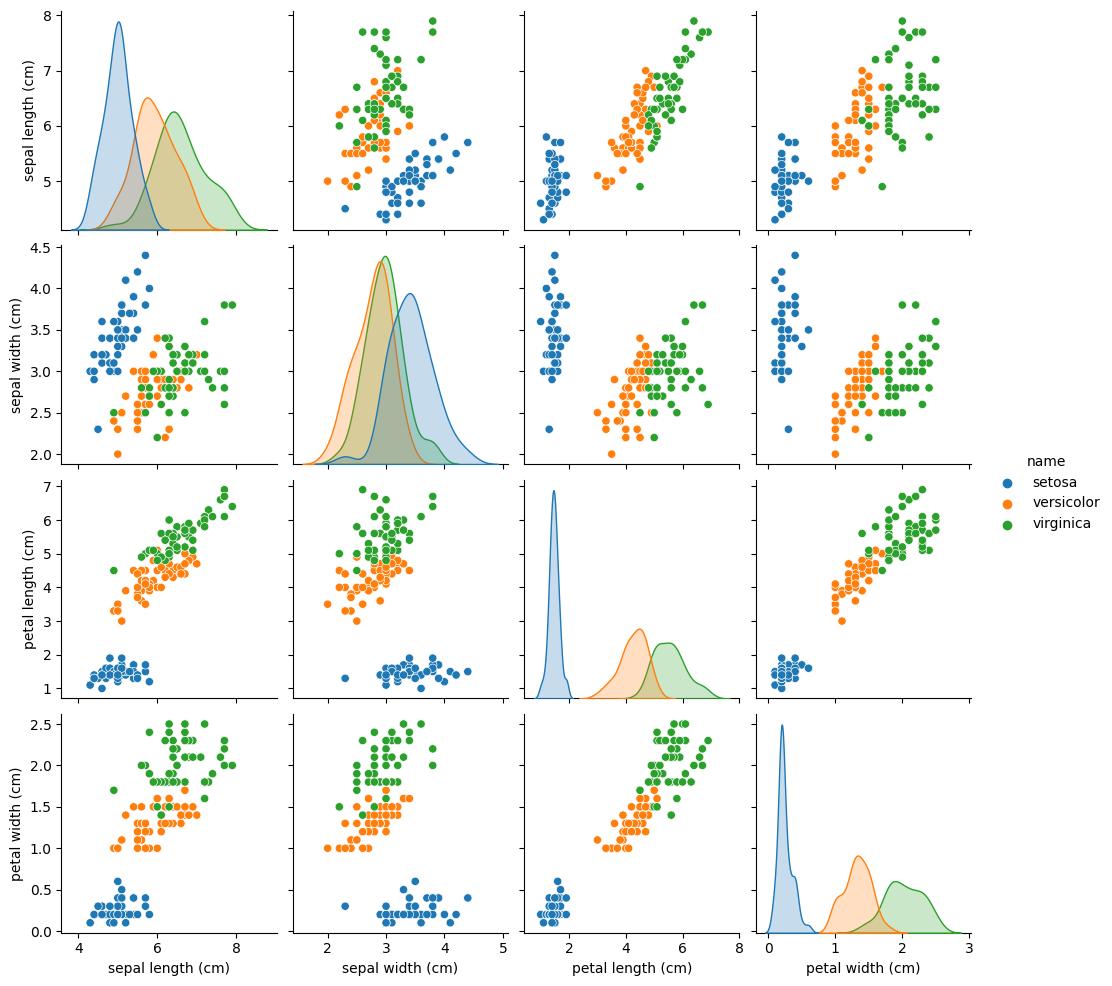

In [8]:
dataset.vis()

In [9]:
analyzer = Analyzer()

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\inspection\_plot\decision_boundary.py:191: UserWarning: The following kwargs were not used by contour: 'legend', 's'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\inspection\_plot\decision_boundary.py:191: UserWarning: The following kwargs were not used by contour: 'legend', 's'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\inspection\_plot\decision_boundary.py:191: UserWarning: The following kwargs were not used by contour: 'legend', 's'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **

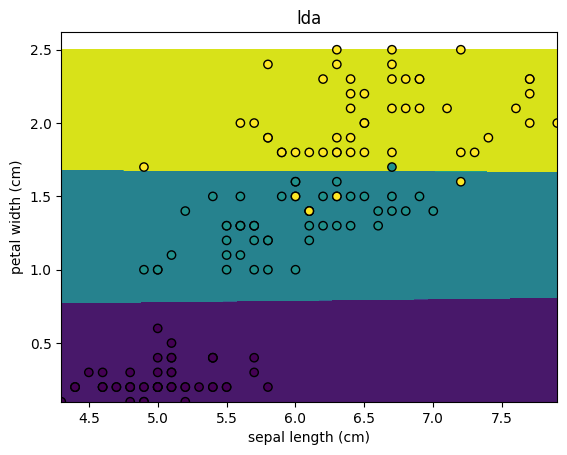

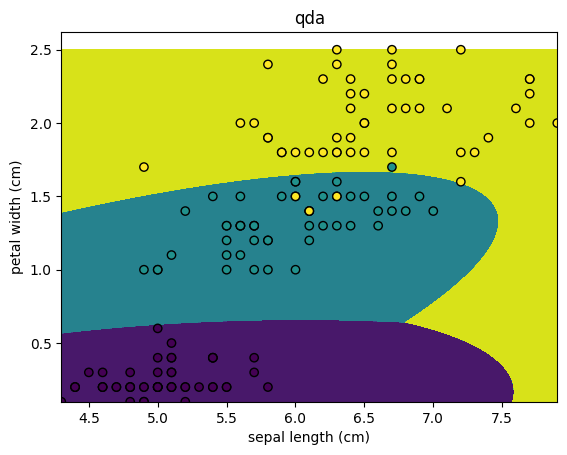

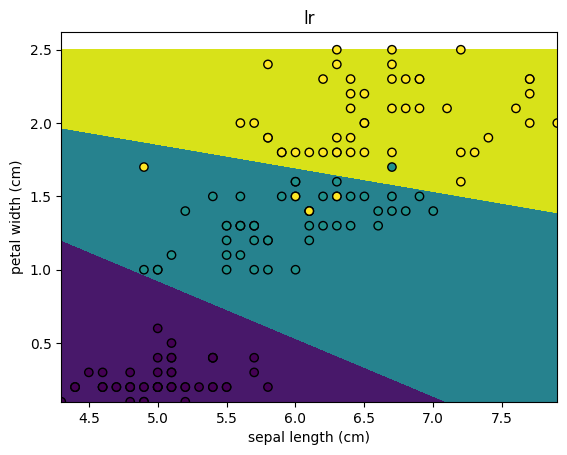

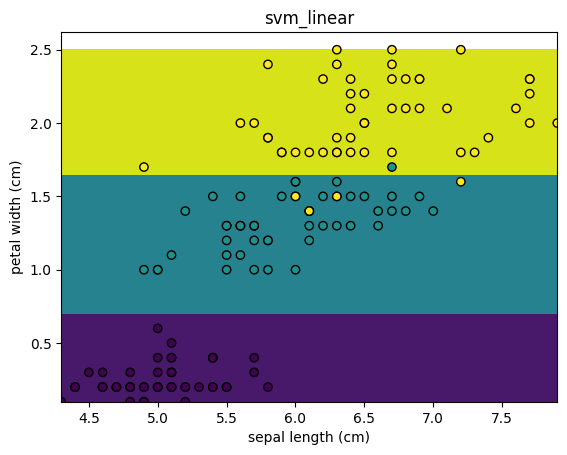

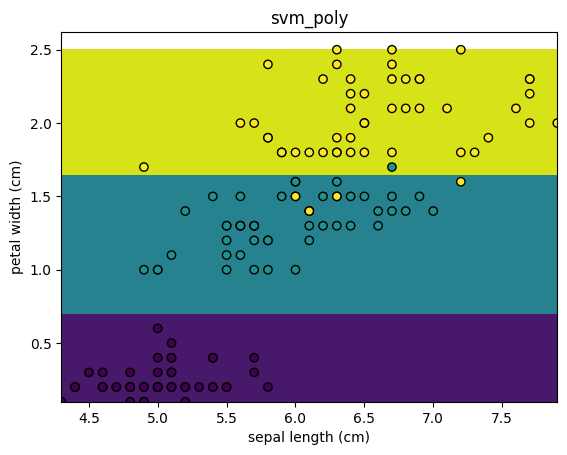

In [10]:
methods = ['lda','qda','lr','svm_linear','svm_poly']
h = 0
for m in methods:
    x1 = dataset.dataset['sepal length (cm)'].to_numpy()
    x2 = dataset.dataset['petal width (cm)'].to_numpy()
    analyzer.set_train_method(m)
    analyzer.fit(np.c_[x1,x2], dataset.dataset['target'].to_numpy())
    analyzer.show_line()

    plt.title(m)
    plt.xlabel('sepal length (cm)')
    plt.ylabel('petal width (cm)')

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\inspection\_plot\decision_boundary.py:191: UserWarning: The following kwargs were not used by contour: 'legend', 's'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\inspection\_plot\decision_boundary.py:191: UserWarning: The following kwargs were not used by contour: 'legend', 's'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\inspection\_plot\decision_boundary.py:191: UserWarning: The following kwargs were not used by contour: 'legend', 's'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **

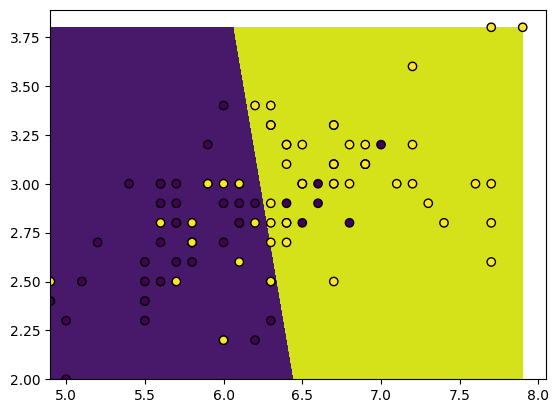

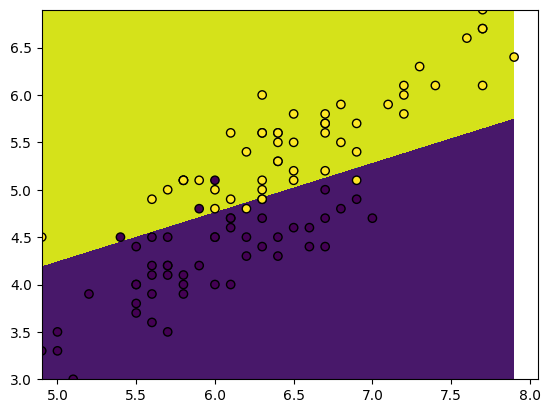

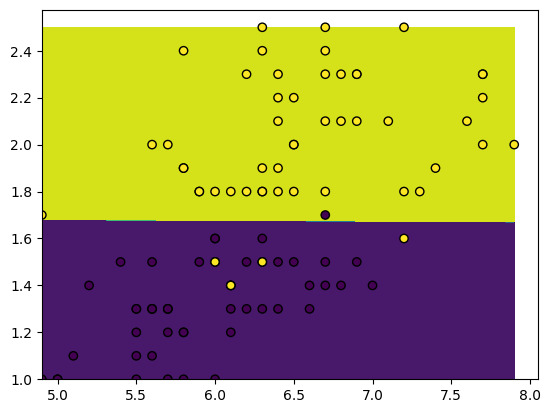

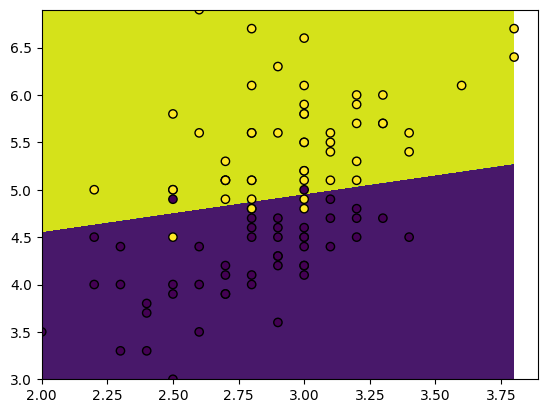

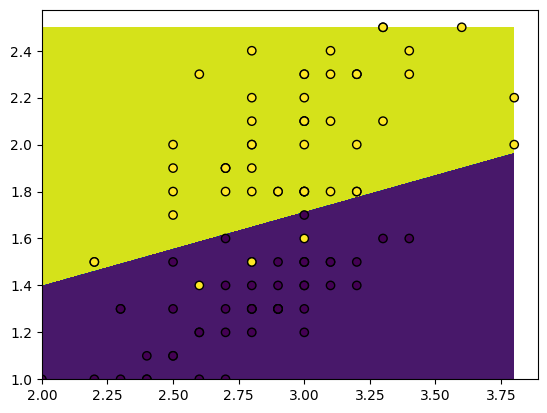

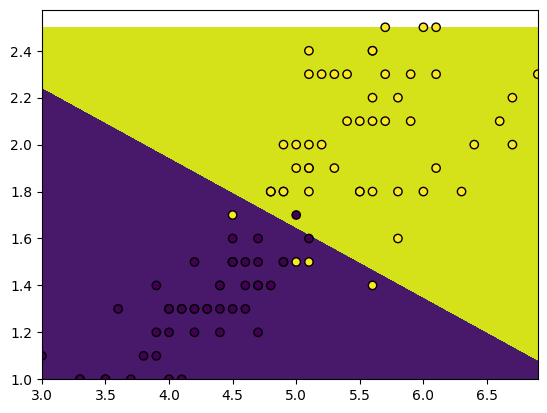

In [11]:
dataset.dataset = dataset.dataset[dataset.dataset['name'] != 'setosa']
#print(dataset.dataset[dataset.dataset.columns[:4]].to_numpy()[0])
#dataset.dataset[dataset.dataset.columns[:4]].to_numpy()
for i in range(4):
    for j in range(i+1,4):
        col1 = dataset.dataset.columns[i]
        col2 = dataset.dataset.columns[j]
        analyzer.set_train_method('lda')
        analyzer.fit(np.c_[dataset.dataset[col1].to_numpy(), dataset.dataset[col2].to_numpy()], dataset.dataset['target'])
        analyzer.show_line()

ROC curve for lda method: [(0.0, 0.0), (0.0, 0.02), (0.0, 0.52), (0.0, 0.56), (0.0, 0.9), (0.02, 0.9), (0.02, 0.98), (0.06, 0.98), (0.06, 1.0), (1.0, 1.0)]
ROC curve for qda method: [(0.0, 0.0), (0.0, 0.02), (0.0, 0.6), (0.0, 0.64), (0.0, 0.98), (0.04, 0.98), (0.04, 1.0), (1.0, 1.0)]
ROC curve for lr method: [(0.0, 0.0), (0.0, 0.02), (0.0, 0.74), (0.0, 0.78), (0.0, 0.86), (0.02, 0.86), (0.02, 0.94), (0.04, 0.94), (0.04, 0.98), (0.08, 0.98), (0.08, 1.0), (1.0, 1.0)]
ROC curve for svm_linear method: [(0.0, 0.0), (0.0, 0.02), (0.0, 0.6), (0.0, 0.64), (0.0, 0.88), (0.02, 0.88), (0.02, 1.0), (1.0, 1.0)]
ROC curve for svm_poly method: [(0.0, 0.0), (0.0, 0.02), (0.0, 0.6), (0.0, 0.64), (0.0, 0.88), (0.02, 0.88), (0.02, 1.0), (1.0, 1.0)]


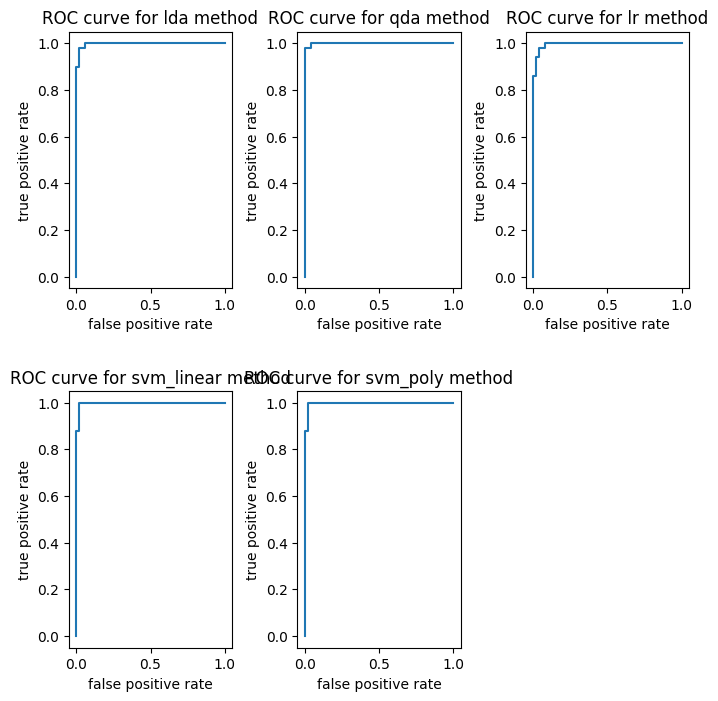

In [12]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(wspace=0.4,hspace=0.4)
for m in methods:
    # x1 = dataset.dataset['sepal length (cm)'].to_numpy()
    # x2 = dataset.dataset['petal width (cm)'].to_numpy()
    analyzer.set_train_method(m)
    analyzer.fit(dataset.dataset[dataset.dataset.columns[:4]].to_numpy(), dataset.dataset['target'].to_numpy())
    analyzer.roc_curve(dataset.dataset[dataset.dataset.columns[:4]].to_numpy(), dataset.dataset['target'].to_numpy(), m, methods.index(m))